In [129]:
from IPython.display import display, HTML
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
from tqdm import tqdm
import json
import io

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
import numpy as np
from scipy.spatial.distance import euclidean, pdist, squareform, cosine

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


sns.set(style="ticks")
plt.rcParams['axes.facecolor']='white'
task_order = ['Length',  'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 'ObjNumber', 'OddManOut', 'CoordinationInversion']
dict_task = {0:'Length',  1:'WordContent', 2:'Depth', 3:'TopConstituents', 4:'BigramShift', 5:'Tense', 6:'SubjNumber', 7:'ObjNumber', 8:'OddManOut', 9:'CoordinationInversion'}

In [49]:
def get_results(dir_path='./mlp_results'):
    columns = ['data_path', 'cache_path', 'result_path', 'batch_size', 'cbatch_size', 'nhid', 'optim', 'kfold', 'tenacity', 'usepytorch', 'epoch_size', 'device']
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        with open(join(dir_path, filename), 'r') as infile:
#             print(filename)
            results = json.load(infile)
            for key, result in results.items():
                list_result.append(result)
                
    df = pd.DataFrame(list_result)[['acc', 'head', 'layer', 'task', 'model_name']]
    
    for column in columns:
        try:
            df = df.drop(columns=column)
        except:
            pass

    return df

In [50]:
def get_top_heads(model_name, task):
    df = get_results(dir_path='./linear_head_wise_results')
    df = df.loc[df['model_name'] == model_name]
    df = df.loc[df['head'] >= 0]
    df = df.loc[df['task'] == dict_task[task]] # Choose task
    df = df.sort_values(by=['acc'], ascending=False)
    display(df)
    list_head = []
    for index, row in df.iterrows():
        list_head.append((row['layer'], row['head']))
    return list_head

print(get_top_heads('gpt2', 2))

,acc,head,layer,task,model_name
7017,30.98,9,0,Depth,gpt2
7018,30.55,10,0,Depth,gpt2
7031,30.24,11,1,Depth,gpt2
7016,29.34,8,0,Depth,gpt2
7063,29.33,7,4,Depth,gpt2
7028,29.25,8,1,Depth,gpt2
7085,29.14,5,6,Depth,gpt2
7049,29.12,5,3,Depth,gpt2
7054,29.09,10,3,Depth,gpt2
7062,28.69,6,4,Depth,gpt2


[(0, 9), (0, 10), (1, 11), (0, 8), (4, 7), (1, 8), (6, 5), (3, 5), (3, 10), (4, 6), (1, 1), (2, 10), (1, 4), (5, 2), (2, 6), (2, 7), (0, 2), (3, 4), (6, 10), (1, 9), (1, 2), (7, 4), (8, 10), (2, 0), (10, 5), (1, 7), (5, 9), (4, 9), (7, 3), (0, 11), (5, 8), (2, 5), (4, 8), (3, 8), (6, 6), (4, 1), (5, 11), (5, 4), (2, 11), (6, 8), (4, 10), (3, 2), (1, 10), (7, 6), (3, 0), (6, 7), (8, 0), (3, 1), (2, 3), (3, 3), (4, 5), (5, 0), (10, 8), (0, 0), (9, 4), (6, 11), (3, 6), (6, 3), (4, 4), (1, 5), (4, 3), (5, 5), (6, 0), (8, 9), (10, 4), (1, 0), (2, 4), (4, 11), (5, 10), (2, 8), (3, 11), (2, 1), (4, 0), (6, 2), (8, 3), (11, 4), (6, 9), (1, 6), (4, 2), (9, 11), (5, 6), (6, 1), (2, 2), (9, 10), (8, 2), (3, 9), (8, 5), (1, 3), (9, 7), (11, 10), (11, 0), (7, 10), (11, 5), (8, 8), (9, 5), (8, 6), (5, 3), (7, 7), (11, 8), (7, 9), (0, 7), (2, 9), (8, 11), (7, 11), (6, 4), (8, 1), (10, 9), (7, 1), (10, 3), (9, 3), (10, 2), (11, 7), (0, 6), (7, 8), (9, 0), (3, 7), (11, 2), (9, 2), (5, 7), (7, 2), (0, 4

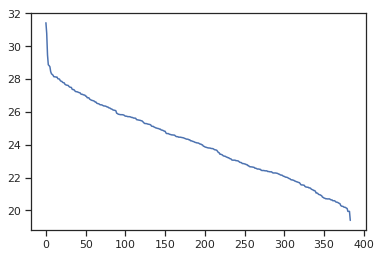

In [25]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
df = df.loc[df['task'] == dict_task[2]] # Choose task
df = df.sort_values(by=['acc'], ascending=False)
dd = df['acc'].tolist()
plt.plot(dd)
# display(df)


In [61]:
df_ori = get_results(dir_path='./linear_head_wise_results')


In [130]:
# df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df_ori.loc[df_ori['head'] >= 0]
# df = df.loc[df['task'] == dict_task[2]] # Choose task

df = df.set_index(['model_name', 'task'])
df = df.sort_values(by=['model_name', 'task', 'acc'], ascending=False)

df_sum = df.groupby(['model_name', 'task'])['acc'].agg('sum')
display(df_sum)
df_sum = df_sum.reset_index()

df = df.reset_index()
df = df.set_index(['model_name', 'task', 'acc'])
df['percent'] = 0.0
df['cumulative'] = 0.0

dict_num_heads = {'bert-base-uncased':144,'bert-large-uncased':384, 'openai-gpt':144, 'gpt2':144, 'transfo-xl-wt103':288}

p_model_name = ''
p_task = ''
temp_percent = 0
temp_cumulate = 0
for i, row in df.iterrows():
    current_cumulative = df_sum.loc[(df_sum['model_name'] == i[0]) & (df_sum['task'] == i[1])].values[0][2]
    if p_model_name != i[0] or  p_task != i[1]:
        temp_percent = 0
        temp_cumulative = current_cumulative
#         print(temp_cumulate, row)
        
    df.at[i, 'percent'] = temp_percent / dict_num_heads[i[0]] * 100
    df.at[i, 'cumulative'] = temp_cumulative / current_cumulative * 100
    
    temp_percent += 1
    temp_cumulative -= i[2]
    p_task = i[1]
    p_model_name = i[0]
    
df = df.reset_index()


model_name          task                 
bert-base-uncased   BigramShift               9501.32
                    CoordinationInversion     8042.57
                    Depth                     3592.95
                    Length                    7636.41
                    ObjNumber                 9467.03
                    OddManOut                 7873.30
                    SubjNumber                9804.34
                    Tense                    10948.13
                    TopConstituents           6720.61
                    WordContent               2148.86
bert-large-uncased  BigramShift              25461.20
                    CoordinationInversion    21349.49
                    Depth                     9253.36
                    Length                   20218.52
                    ObjNumber                24653.52
                    OddManOut                21476.02
                    SubjNumber               25277.83
                    Tense               

<Figure size 500x200 with 0 Axes>

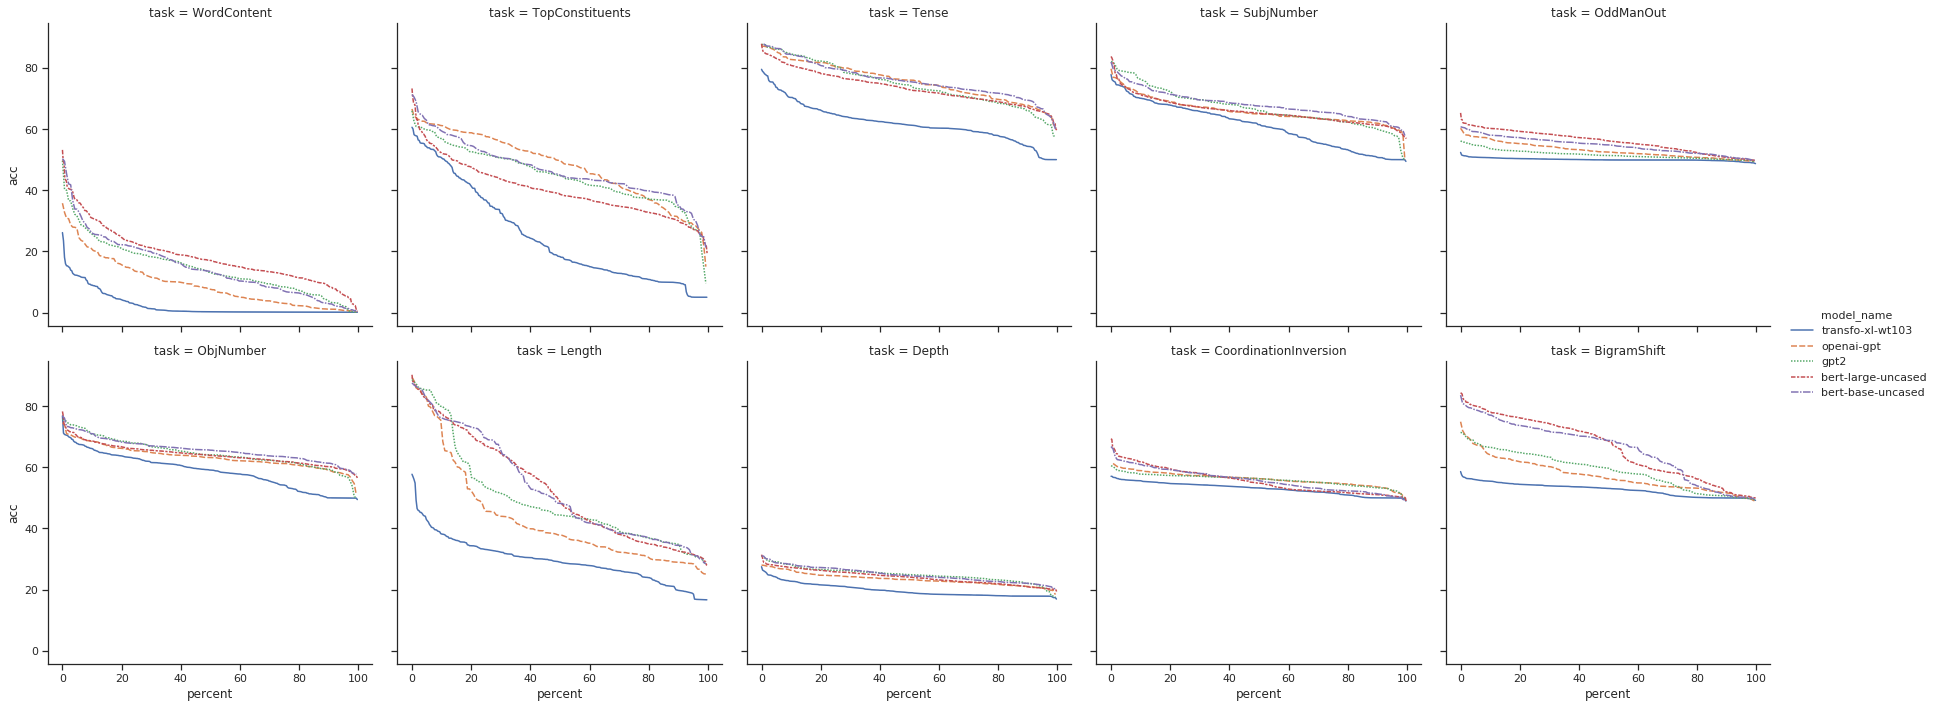

In [133]:
plt.figure(figsize=(10, 4), dpi=50)

g = sns.relplot(x='percent', y='acc', col='task', col_wrap=5, hue='model_name', data=df, kind="line",style='model_name')    

In [97]:
df

head  layer   percent
model_name        task        acc                         
transfo-xl-wt103  WordContent 26.13    14      1  0.000000
                              23.48    10      1  0.003472
                              18.05     6      1  0.006944
                              15.93     6     16  0.010417
                              15.28     3     12  0.013889
                              15.24    12     14  0.017361
                              14.91    11     11  0.020833
                              14.70    12      0  0.024306
                              13.86    11      0  0.027778
                              13.68     7      7  0.031250
                              12.81    14     13  0.034722
                              12.52     3     16  0.038194
                              12.28    12     12  0.041667
                              12.21     5     16  0.045139
                              12.18     0     13  0.048611
                              12.06     7     17  0.052083
                              11.95     0     15  0.055556
                              11.83     0     12  0.059028
                              11.62     3     13  0.062500
                              11.51     3      0  0.065972
                              11.47    11     17  0.069444
                              11.45     8     13  0.072917
                              11.43     0     11  0.076389
                              10.67    14      9  0.079861
                              10.42    15     13  0.083333
                              9.48     15      0  0.086806
                              9.27     11      9  0.090278
                              9.24      4     12  0.093750
                              8.97     13      1  0.097222
                              8.94      1     13  0.100694
...                                   ...    ...       ...
bert-base-uncased BigramShift 54.31     3      2  0.791667
                              53.94     3      1  0.798611
                              53.78     7      2  0.805556
                              53.49     9      2  0.812500
                              53.32     8      2  0.819444
                              53.05     4      1  0.826389
                              52.90    11      1  0.833333
                              52.77    11      2  0.840278
                              52.53     0      2  0.847222
                              52.14     9      1  0.854167
                              51.92     0      1  0.861111
                              51.87    10      1  0.868056
                              51.68     8      1  0.875000
                              51.46     1      1  0.881944
                              51.04    11      0  0.888889
                              50.92     8      0  0.895833
                              50.75     6      0  0.909722
                              50.75     2      1  0.909722
                              50.55     5      1  0.916667
                              50.43     3      0  0.923611
                              50.29     1      0  0.937500
                              50.29     7      0  0.937500
                              50.25     6      1  0.944444
                              50.23     0      0  0.951389
                              50.19     2      0  0.958333
                              50.16    10      0  0.965278
                              50.11     9      0  0.972222
                              49.98     4      0  0.979167
                              49.89     5      0  0.986111
                              49.74     7      1  0.993056

[11040 rows x 3 columns]

In [46]:
a = np.array([[1,2,3 ,4],[2,3,4,5]])
b = np.array([[3,4,5,6], [4,5,6,7]])
d = [a, b]
c = np.concatenate(d, axis=1)
print(c)

[[1 2 3 4 3 4 5 6]
 [2 3 4 5 4 5 6 7]]
